
# IMPACT OF ESG PERFORMANCE ON FINANCIAL PERFORMANCE

# Master Thesis Project

------------------------

## Python Script for Multivariate Linear Regression Analysis

------------------------

#### Supervisor 	
Irene Unceta Mendieta, irene.unceta@esade.edu

#### Student
Nicolas Niederberger, nicolas.niederberger@alumni.esade.edu

-------------------------

ESADE Business School

Barcelona, October 4, 2021

# Rearrange raw data files retrieved from Bloomberg

Importing all open source data analysis and manipulation tools and libraries used within the script.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import seaborn as sns
from sklearn.impute import KNNImputer
import sklearn as sk
import datetime

Read file with raw data points retrieved from Bloomberg starting from the year 2015 until end of 2020.

In [2]:
df = pd.read_excel('20211004_Data Master File_Nicolas Niederberger.xlsx', 
                   sheet_name = 'SXXP 600 31.12.2015-2020_raw', header=3)
df

,Unnamed: 0,Unnamed: 1,Dates,2020-12-31 00:00:00,2019-12-31 00:00:00,2018-12-31 00:00:00,2017-12-29 00:00:00,2016-12-30 00:00:00,2015-12-31 00:00:00
0,CSP LN Equity,Return on Assets,RETURN_ON_ASSET,-0.2465,12.7233,13.0039,12.6042,7.6045,3.0612
1,NaN,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,46.6942,46.2810,46.6942,46.6942,42.1488,35.5372
2,NaN,Governance Disclosure Score,GOVNCE_DISCLOSURE_SCORE,57.1429,57.1429,57.1429,60.7143,62.5000,48.2143
3,NaN,Environmental Disclosure Score,ENVIRON_DISCLOSURE_SCORE,41.8605,42.6357,43.4109,41.8605,31.0078,29.4574
4,NaN,Social Disclosure Score,SOCIAL_DISCLOSURE_SCORE,47.3684,43.8596,43.8596,43.8596,47.3684,36.8421
...,...,...,...,...,...,...,...,...,...
8395,NaN,S&P Global Environmental Dimension Rank,ROBECOSAM_ENV_DIMENSION_RANK,29.0000,14.0000,20.0000,17.0000,NaN,NaN
8396,NaN,S&P Global Social Dimension Rank,ROBECOSAM_SOCIAL_DIMENSION_RANK,32.0000,21.0000,26.0000,19.0000,NaN,NaN
8397,NaN,S&P Global Governance & Economic Dimension Rank,ROBECOSAM_ECON_DIMENSION_RANK,16.0000,14.0000,13.0000,2.0000,NaN,NaN
8398,NaN,Number of Employees,NUM_OF_EMPLOYEES,12870.0000,15678.0000,16714.0000,17339.0000,17757.0000,18327.0000


Rename columns to rearrange the data structure.

In [3]:
df.rename(columns={'Unnamed: 0': 'Securities', 'Unnamed: 1': 'Variable_description', 'Dates':'Variable_code'}, inplace = True)
df

,Securities,Variable_description,Variable_code,2020-12-31 00:00:00,2019-12-31 00:00:00,2018-12-31 00:00:00,2017-12-29 00:00:00,2016-12-30 00:00:00,2015-12-31 00:00:00
0,CSP LN Equity,Return on Assets,RETURN_ON_ASSET,-0.2465,12.7233,13.0039,12.6042,7.6045,3.0612
1,NaN,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,46.6942,46.2810,46.6942,46.6942,42.1488,35.5372
2,NaN,Governance Disclosure Score,GOVNCE_DISCLOSURE_SCORE,57.1429,57.1429,57.1429,60.7143,62.5000,48.2143
3,NaN,Environmental Disclosure Score,ENVIRON_DISCLOSURE_SCORE,41.8605,42.6357,43.4109,41.8605,31.0078,29.4574
4,NaN,Social Disclosure Score,SOCIAL_DISCLOSURE_SCORE,47.3684,43.8596,43.8596,43.8596,47.3684,36.8421
...,...,...,...,...,...,...,...,...,...
8395,NaN,S&P Global Environmental Dimension Rank,ROBECOSAM_ENV_DIMENSION_RANK,29.0000,14.0000,20.0000,17.0000,NaN,NaN
8396,NaN,S&P Global Social Dimension Rank,ROBECOSAM_SOCIAL_DIMENSION_RANK,32.0000,21.0000,26.0000,19.0000,NaN,NaN
8397,NaN,S&P Global Governance & Economic Dimension Rank,ROBECOSAM_ECON_DIMENSION_RANK,16.0000,14.0000,13.0000,2.0000,NaN,NaN
8398,NaN,Number of Employees,NUM_OF_EMPLOYEES,12870.0000,15678.0000,16714.0000,17339.0000,17757.0000,18327.0000


Fill in blanks in column "Securities" with the corresponding security names and check for NA values.

In [4]:
df['Securities'] = df['Securities'].fillna(method = "ffill")

df.isna().sum()

Securities                 0
Variable_description       0
Variable_code              0
2020-12-31 00:00:00      440
2019-12-31 00:00:00      555
2018-12-31 00:00:00      801
2017-12-29 00:00:00     1052
2016-12-30 00:00:00     1550
2015-12-31 00:00:00     2991
dtype: int64

Rearrange data points to bring date values from columns to axes.

In [5]:
final_df = pd.melt(df, id_vars=['Securities','Variable_description','Variable_code'],var_name='date')

final_df

,Securities,Variable_description,Variable_code,date,value
0,CSP LN Equity,Return on Assets,RETURN_ON_ASSET,2020-12-31,-0.2465
1,CSP LN Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2020-12-31,46.6942
2,CSP LN Equity,Governance Disclosure Score,GOVNCE_DISCLOSURE_SCORE,2020-12-31,57.1429
3,CSP LN Equity,Environmental Disclosure Score,ENVIRON_DISCLOSURE_SCORE,2020-12-31,41.8605
4,CSP LN Equity,Social Disclosure Score,SOCIAL_DISCLOSURE_SCORE,2020-12-31,47.3684
...,...,...,...,...,...
50395,PEO PW Equity,S&P Global Environmental Dimension Rank,ROBECOSAM_ENV_DIMENSION_RANK,2015-12-31,NaN
50396,PEO PW Equity,S&P Global Social Dimension Rank,ROBECOSAM_SOCIAL_DIMENSION_RANK,2015-12-31,NaN
50397,PEO PW Equity,S&P Global Governance & Economic Dimension Rank,ROBECOSAM_ECON_DIMENSION_RANK,2015-12-31,NaN
50398,PEO PW Equity,Number of Employees,NUM_OF_EMPLOYEES,2015-12-31,18327.0000


Ascend order of values in column "Variable_code" and "date" for better visualization of data.

In [6]:
final_df.sort_values(by=["Securities", "Variable_description", 'date'], ascending = False, inplace = True)

final_df

,Securities,Variable_description,Variable_code,date,value
8156,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2020-12-31,3.6098
16556,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2019-12-31,3.4389
24956,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2018-12-31,3.0384
33356,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2017-12-29,2.5551
41756,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2016-12-30,2.9299
...,...,...,...,...,...
14281,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2019-12-31,58.2645
22681,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2018-12-31,59.0909
31081,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2017-12-29,59.5041
39481,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2016-12-30,57.0248


# Include one year lag for financial performance variables

Reduce year dates of variables "Return on Assets" and "Tobin's Q Ratio" by 1 year to reflect the one year lag between ESG and financial performance in the data set. After the modification, we will no longer need the Financial Performance related data of 2014 and the ESG Performance related data of 2020.

E.g.: If we want to analyse the ESG Performance of 2015, literature suggests to analyse the correlation to the Financial Performance of 2016, since the effects are reflected in the data with a one year lag. Therefore, we reduce the dates of the Financial Performance related variables by one year.

In [7]:
print(final_df.dtypes)

Securities                      object
Variable_description            object
Variable_code                   object
date                    datetime64[ns]
value                          float64
dtype: object


Add the column "year" since the exact date is not needed for the analysis and year is easier to work with.

In [8]:
final_df['year'] = pd.DatetimeIndex(final_df['date']).year

final_df

,Securities,Variable_description,Variable_code,date,value,year
8156,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2020-12-31,3.6098,2020
16556,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2019-12-31,3.4389,2019
24956,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2018-12-31,3.0384,2018
33356,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2017-12-29,2.5551,2017
41756,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2016-12-30,2.9299,2016
...,...,...,...,...,...,...
14281,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2019-12-31,58.2645,2019
22681,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2018-12-31,59.0909,2018
31081,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2017-12-29,59.5041,2017
39481,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2016-12-30,57.0248,2016


Reduce variables by one year and save in new column.

In [9]:
final_df['year_updated'] = final_df.loc[(final_df['Variable_code'] == 'TOBIN_Q_RATIO') | (final_df['Variable_code'] == 'RETURN_ON_ASSET') , 'year'] - 1

final_df

,Securities,Variable_description,Variable_code,date,value,year,year_updated
8156,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2020-12-31,3.6098,2020,NaN
16556,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2019-12-31,3.4389,2019,NaN
24956,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2018-12-31,3.0384,2018,NaN
33356,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2017-12-29,2.5551,2017,NaN
41756,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2016-12-30,2.9299,2016,NaN
...,...,...,...,...,...,...,...
14281,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2019-12-31,58.2645,2019,NaN
22681,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2018-12-31,59.0909,2018,NaN
31081,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2017-12-29,59.5041,2017,NaN
39481,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2016-12-30,57.0248,2016,NaN


Fill in NaN values in newly created column with old values. Then, rename and drop the columns to have a similar data frame structure as before.

In [10]:
final_df.year_updated.fillna(final_df.year, inplace=True)

In [11]:
final_df['year'] = final_df['year_updated']

In [12]:
final_df = final_df.drop('year_updated',1)

In [13]:
final_df['year'] = final_df['year'].astype(int)

In [14]:
final_df['year']

8156     2020
16556    2019
24956    2018
33356    2017
41756    2016
         ... 
14281    2019
22681    2018
31081    2017
39481    2016
47881    2015
Name: year, Length: 50400, dtype: int32

In [15]:
print(final_df.dtypes)

Securities                      object
Variable_description            object
Variable_code                   object
date                    datetime64[ns]
value                          float64
year                             int32
dtype: object


In [16]:
#Old data type code:

#final_df['date'] = final_df['date'].astype(str)
#final_df['date'] = pd.to_datetime(final_df['date'])
#print(final_df.dtypes)
#final_df
#final_df.to_csv('test.csv')

# Fill in missing values with KNN method

Check the amount of missing values and demonstrate why the KNN method is applied to replace the missing values instead of other methods such as replacement through mean oder median values.

In the following section, a data set with independent variable "Return on Assets" and one dependent variable "ESG Disclosure Score" from 2019 is created and four methods (KNN = 15, KNN = 5, mean, median) to replace missing values are visualized. With that analysis, we try to deduct the most accurate method before training the Multivariate Linear Regression.

In [17]:
final_df.isnull().sum(axis = 0)

Securities                 0
Variable_description       0
Variable_code              0
date                       0
value                   7389
year                       0
dtype: int64

In [18]:
final_df

,Securities,Variable_description,Variable_code,date,value,year
8156,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2020-12-31,3.6098,2020
16556,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2019-12-31,3.4389,2019
24956,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2018-12-31,3.0384,2018
33356,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2017-12-29,2.5551,2017
41756,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2016-12-30,2.9299,2016
...,...,...,...,...,...,...
14281,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2019-12-31,58.2645,2019
22681,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2018-12-31,59.0909,2018
31081,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2017-12-29,59.5041,2017
39481,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2016-12-30,57.0248,2016


In [19]:
#final_df.to_csv('test.csv')

In [20]:
ESGD_2019 = final_df.loc[((final_df['year'] == 2019) & 
                          (final_df['Variable_code'] == 'ESG_DISCLOSURE_SCORE'),
                           'value')]

ESGD_2019

ESGD_2019.isnull().sum(axis = 0)

31

In [21]:
ROA_2019 = final_df.loc[((final_df['year'] == 2019) & 
                          (final_df['Variable_code'] == 'RETURN_ON_ASSET'),
                           'value')]

ROA_2019

ROA_2019.isnull().sum(axis = 0)

1

Create data set with independent variable "Return on Assets" and one dependent variable "ESG Disclosure Score" from 2019.

In [22]:
Missing_values = pd.DataFrame(list(zip(ESGD_2019, ROA_2019)), columns = ['ESGD_2019', 'ROA_2019'])

Missing_values

Missing_values.isnull().sum(axis = 0)

ESGD_2019    31
ROA_2019      1
dtype: int64

We find 31 missing values for ESGD which need to be replaced. The missing values for ROA for this preliminary verification of the method are disregarded.

### KNN

The KNN tool from SKlearn to fill in missing values is applied. KNN can be understood as the average of N data points within the data set closest for each missing value. It is analysing data points within the same variable as well as other variables where no data is missing (e.g. revenue, number of employees, environmental, social or governance disclosure score etc.) underlying in the data set and finds through their correlation the most accurate value for the missing value. It was found that most commonly, N = 15 should provide best results in the analysis. In our analysis, we try to visualize N = 15 and N = 5.

E.g. if you have 10 missing values, you look at the overall data distribution of all variables within the data set available. Then, for each of those 10 missing values, the 5/15 closest points are taken and averaged to replace it. 

N = 15:

In [23]:
imputer = KNNImputer(n_neighbors = 15, weights = 'distance') # Numero  optimo
KNN_df = imputer.fit_transform(Missing_values)
dataset_2 = pd.DataFrame(KNN_df)
dataset_2

#dataset_2.to_csv('KNN.csv')

,0,1
0,51.3158,0.9085
1,48.7603,4.1762
2,56.1983,4.1404
3,36.3636,-10.9059
4,64.8760,2.1219
...,...,...
595,35.9504,3.4907
596,58.6777,3.5202
597,52.8926,6.9164
598,60.3306,3.1720


N = 5:

In [24]:
imputer=KNNImputer(n_neighbors=5,weights='distance') 
KNN_df = imputer.fit_transform(Missing_values)
dataset_3 = pd.DataFrame(KNN_df)
dataset_3

,0,1
0,51.3158,0.9085
1,48.7603,4.1762
2,56.1983,4.1404
3,36.3636,-10.9059
4,64.8760,2.1219
...,...,...
595,35.9504,3.4907
596,58.6777,3.5202
597,52.8926,6.9164
598,60.3306,3.1720


In [25]:
Missing_values

,ESGD_2019,ROA_2019
0,51.3158,0.9085
1,48.7603,4.1762
2,56.1983,4.1404
3,36.3636,-10.9059
4,64.8760,2.1219
...,...,...
595,35.9504,3.4907
596,58.6777,3.5202
597,52.8926,6.9164
598,60.3306,3.1720


Create 4 new columns in dataframe "Missing Values" for each of the four methods conducted.

(1) KNN with 15
(2) KNN with 5
(3) Median of values
(4) Mean of values

In [26]:
Missing_values['ESGD_2019_missing_knn_15'] = dataset_2.loc[:,0]
Missing_values['ESGD_2019_missing_knn_5'] = dataset_3.loc[:,0]
Missing_values['ESGD_2019_missing_median'] = Missing_values['ESGD_2019'].fillna(Missing_values['ESGD_2019'].median())
Missing_values['ESGD_2019_missing_mean'] = Missing_values['ESGD_2019'].fillna(Missing_values['ESGD_2019'].mean())

Missing_values

,ESGD_2019,ROA_2019,ESGD_2019_missing_knn_15,ESGD_2019_missing_knn_5,ESGD_2019_missing_median,ESGD_2019_missing_mean
0,51.3158,0.9085,51.3158,51.3158,51.3158,51.3158
1,48.7603,4.1762,48.7603,48.7603,48.7603,48.7603
2,56.1983,4.1404,56.1983,56.1983,56.1983,56.1983
3,36.3636,-10.9059,36.3636,36.3636,36.3636,36.3636
4,64.8760,2.1219,64.8760,64.8760,64.8760,64.8760
...,...,...,...,...,...,...
595,35.9504,3.4907,35.9504,35.9504,35.9504,35.9504
596,58.6777,3.5202,58.6777,58.6777,58.6777,58.6777
597,52.8926,6.9164,52.8926,52.8926,52.8926,52.8926
598,60.3306,3.1720,60.3306,60.3306,60.3306,60.3306


Create a final column with a flag for missing ESGD values (i.e. True for missing values, otherwise False)

In [27]:
Missing_values['Missing Values'] = Missing_values['ESGD_2019'].isna()

Missing_values

,ESGD_2019,ROA_2019,ESGD_2019_missing_knn_15,ESGD_2019_missing_knn_5,ESGD_2019_missing_median,ESGD_2019_missing_mean,Missing Values
0,51.3158,0.9085,51.3158,51.3158,51.3158,51.3158,False
1,48.7603,4.1762,48.7603,48.7603,48.7603,48.7603,False
2,56.1983,4.1404,56.1983,56.1983,56.1983,56.1983,False
3,36.3636,-10.9059,36.3636,36.3636,36.3636,36.3636,False
4,64.8760,2.1219,64.8760,64.8760,64.8760,64.8760,False
...,...,...,...,...,...,...,...
595,35.9504,3.4907,35.9504,35.9504,35.9504,35.9504,False
596,58.6777,3.5202,58.6777,58.6777,58.6777,58.6777,False
597,52.8926,6.9164,52.8926,52.8926,52.8926,52.8926,False
598,60.3306,3.1720,60.3306,60.3306,60.3306,60.3306,False


Visualizing with the help of sns.scatterplot how the missing values are distributed and what method is most accurate to be applied.

<AxesSubplot:xlabel='ROA_2019', ylabel='ESGD_2019_missing_knn_15'>

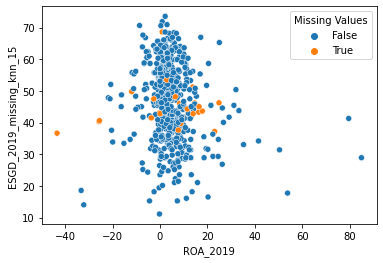

In [28]:
#KNN 15

sns.scatterplot(data = Missing_values, x = "ROA_2019", y = "ESGD_2019_missing_knn_15", hue = 'Missing Values')

<AxesSubplot:xlabel='ROA_2019', ylabel='ESGD_2019_missing_knn_5'>

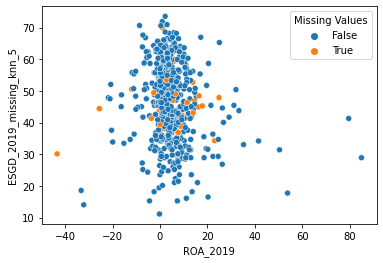

In [29]:
#KNN 5

sns.scatterplot(data=Missing_values, x="ROA_2019", y="ESGD_2019_missing_knn_5",hue='Missing Values')

<AxesSubplot:xlabel='ROA_2019', ylabel='ESGD_2019_missing_median'>

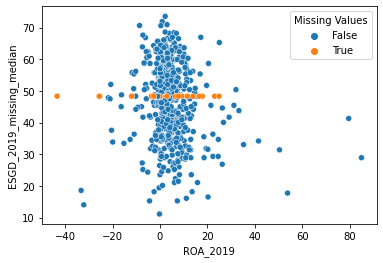

In [30]:
#Median

sns.scatterplot(data=Missing_values, x="ROA_2019", y="ESGD_2019_missing_median",hue='Missing Values')

<AxesSubplot:xlabel='ROA_2019', ylabel='ESGD_2019_missing_mean'>

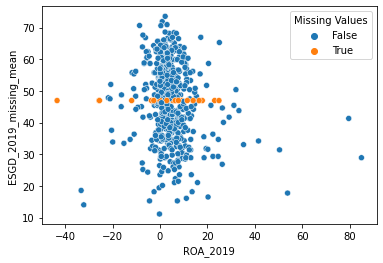

In [31]:
#Mean

sns.scatterplot(data=Missing_values, x="ROA_2019", y="ESGD_2019_missing_mean",hue='Missing Values')

In [32]:
Missing_values.corr()

,ESGD_2019,ROA_2019,ESGD_2019_missing_knn_15,ESGD_2019_missing_knn_5,ESGD_2019_missing_median,ESGD_2019_missing_mean,Missing Values
ESGD_2019,1.000000,-0.139324,1.000000,1.000000,1.000000,1.000000e+00,NaN
ROA_2019,-0.139324,1.000000,-0.123952,-0.120651,-0.130936,-1.308678e-01,-4.324253e-03
ESGD_2019_missing_knn_15,1.000000,-0.123952,1.000000,0.998628,0.989663,9.909646e-01,-3.584581e-02
ESGD_2019_missing_knn_5,1.000000,-0.120651,0.998628,1.000000,0.986339,9.875006e-01,-3.062521e-02
ESGD_2019_missing_median,1.000000,-0.130936,0.989663,0.986339,1.000000,9.996471e-01,2.656505e-02
ESGD_2019_missing_mean,1.000000,-0.130868,0.990965,0.987501,0.999647,1.000000e+00,7.387844e-16
Missing Values,NaN,-0.004324,-0.035846,-0.030625,0.026565,7.387844e-16,1.000000e+00


To sum it up, it can be stated that the KNN = 15 method visualizes the distribution of the underlying data set most accurately and therefore, this method is applied to fill in the missing values of the data set overall.

In simpler words, the scatterplot which shows the least amount of orange (i.e. True for missing) and that is reflecting the most similar pattern to the blue points is the most accurate one. In the above case, it is KNN = 15.

# Save data from different years as separate tabs before training the Multivariate Linear Regression analysis

In [33]:
year_unique = final_df['year'].unique()
year_unique 

array([2020, 2019, 2018, 2017, 2016, 2015, 2014])

As explained above, we will no longer need the years 2014 and 2020 for the analysis. Therefore, we are removing these from the "year_unique" variable.

In [34]:
year_unique = year_unique[1:-1]

year_unique

array([2019, 2018, 2017, 2016, 2015])

Looking into the dataframe for year 2016

In [35]:
final_df[final_df['year']==year_unique[3]]

,Securities,Variable_description,Variable_code,date,value,year
41756,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2016-12-30,2.9299,2016
33355,ZURN SE Equity,Tobin's Q Ratio,TOBIN_Q_RATIO,2017-12-29,1.0309,2016
41752,ZURN SE Equity,Social Disclosure Score,SOCIAL_DISCLOSURE_SCORE,2016-12-30,46.6667,2016
41758,ZURN SE Equity,S&P Global Social Dimension Rank,ROBECOSAM_SOCIAL_DIMENSION_RANK,2016-12-30,89.0000,2016
41759,ZURN SE Equity,S&P Global Governance & Economic Dimension Rank,ROBECOSAM_ECON_DIMENSION_RANK,2016-12-30,95.0000,2016
...,...,...,...,...,...,...
39486,1COV GY Equity,R & D Expenditure to Net Sales,RD_EXPEND_TO_NET_SALES,2016-12-30,2.1757,2016
39492,1COV GY Equity,Number of Employees,NUM_OF_EMPLOYEES,2016-12-30,15122.0000,2016
39482,1COV GY Equity,Governance Disclosure Score,GOVNCE_DISCLOSURE_SCORE,2016-12-30,46.4286,2016
39483,1COV GY Equity,Environmental Disclosure Score,ENVIRON_DISCLOSURE_SCORE,2016-12-30,58.9147,2016


Saving the data into five different worksheets filtered for each of the five years 2015, 2016, 2017, 2018 and 2019. These will be saved into a pre-defined excel which will be used further for the training of the Multivariate Linear Regression model.

In [36]:
pd.DataFrame({'a':[0,1]}).to_excel('Output Python_Data Preparation.xlsx')

In [37]:
with pd.ExcelWriter('Output Python_Data Preparation.xlsx') as writer:
  for i in year_unique:
    final_df[final_df['year']==i].to_excel(writer, sheet_name=str(i), index=False)

# Read data for different years and replace missing values with KNN method

Read the different worksheets and create separate dataframes.

In [38]:
df_2015 = pd.read_excel('Output Python_Data Preparation.xlsx', 
                   sheet_name = '2015')

df_2016 = pd.read_excel('Output Python_Data Preparation.xlsx', 
                   sheet_name = '2016')

df_2017 = pd.read_excel('Output Python_Data Preparation.xlsx', 
                   sheet_name = '2017')

df_2018 = pd.read_excel('Output Python_Data Preparation.xlsx', 
                   sheet_name = '2018')

df_2019 = pd.read_excel('Output Python_Data Preparation.xlsx', 
                   sheet_name = '2019')

Transpose the dataframes and check for missing values.

In [39]:
df_2015 = df_2015.pivot(index = 'Securities',columns= 'Variable_description', values='value')

df_2016 = df_2016.pivot(index = 'Securities',columns= 'Variable_description', values='value')

df_2017 = df_2017.pivot(index = 'Securities',columns= 'Variable_description', values='value')

df_2018 = df_2018.pivot(index = 'Securities',columns= 'Variable_description', values='value')

df_2019 = df_2019.pivot(index = 'Securities',columns= 'Variable_description', values='value')

df_2015

Variable_description,ESG Disclosure Score,Environmental Disclosure Score,Governance Disclosure Score,Number of Employees,R & D Expenditure to Net Sales,Return on Assets,Revenue,S&P Global ESG Rank,S&P Global Environmental Dimension Rank,S&P Global Governance & Economic Dimension Rank,S&P Global Social Dimension Rank,Social Disclosure Score,Tobin's Q Ratio,Total Debt to Total Assets
Securities,,,,,,,,,,,,,,
1COV GY Equity,51.2397,54.2636,41.0714,15761.0,2.1271,7.6571,12082.0000,NaN,NaN,NaN,NaN,54.3860,1.8804,27.0630
A2A IM Equity,56.6116,54.2636,42.8571,12298.0,0.0000,2.2984,4732.0000,NaN,NaN,NaN,NaN,75.4386,1.1057,38.5777
AAK SS Equity,52.4793,50.3876,57.1429,2738.0,0.0000,6.4543,20114.0000,NaN,NaN,NaN,NaN,52.6316,2.0376,17.4079
AAL LN Equity,56.1983,48.8372,76.7857,91000.0,0.4058,3.1205,20455.0000,NaN,NaN,NaN,NaN,52.6316,0.9859,34.5433
AALB NA Equity,16.9421,6.9767,48.2143,14709.0,0.0000,6.5221,2475.3000,NaN,NaN,NaN,NaN,8.7719,1.7121,27.8459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRT1V FH Equity,65.2893,62.7907,73.2143,18856.0,2.6248,6.4117,5029.0000,NaN,NaN,NaN,NaN,63.1579,2.1371,12.9182
WTB LN Equity,33.8843,20.1550,60.7143,41175.0,0.0000,9.2719,2921.8000,NaN,NaN,NaN,NaN,38.5965,1.9542,21.9486
YAR NO Equity,55.7851,50.3876,66.0714,12883.0,0.1491,5.3140,13420.7265,NaN,NaN,NaN,NaN,57.8947,1.1523,12.6953


Check for missing data. Interestingly, data availability increased substantially from 2015 to 2019.

In [40]:
df_2015.isnull().sum(axis = 0)

Variable_description
ESG Disclosure Score                                60
Environmental Disclosure Score                      84
Governance Disclosure Score                         60
Number of Employees                                 31
R & D Expenditure to Net Sales                     158
Return on Assets                                    25
Revenue                                             24
S&P Global ESG Rank                                600
S&P Global Environmental Dimension Rank            600
S&P Global Governance & Economic Dimension Rank    600
S&P Global Social Dimension Rank                   600
Social Disclosure Score                             64
Tobin's Q Ratio                                     40
Total Debt to Total Assets                          25
dtype: int64

In [41]:
#df_2019

Remove securities from sample where financial performance values are missing.

In [42]:
df_2015.dropna(subset = ["Return on Assets", "Tobin's Q Ratio"], inplace=True)
df_2016.dropna(subset = ["Return on Assets", "Tobin's Q Ratio"], inplace=True)
df_2017.dropna(subset = ["Return on Assets", "Tobin's Q Ratio"], inplace=True)
df_2018.dropna(subset = ["Return on Assets", "Tobin's Q Ratio"], inplace=True)
df_2019.dropna(subset = ["Return on Assets", "Tobin's Q Ratio"], inplace=True)

Replace missing values for ESGP variables with KNN = 15 method

In [67]:
ML_data_2015 = df_2015.loc[:,['ESG Disclosure Score', 'Environmental Disclosure Score', 'Social Disclosure Score','Governance Disclosure Score', 'S&P Global ESG Rank', 'S&P Global Environmental Dimension Rank', 'S&P Global Governance & Economic Dimension Rank', 'S&P Global Social Dimension Rank', 'Return on Assets', "Tobin's Q Ratio"]]
ML_data_2016 = df_2016.loc[:,['ESG Disclosure Score', 'Environmental Disclosure Score', 'Social Disclosure Score','Governance Disclosure Score', 'S&P Global ESG Rank', 'S&P Global Environmental Dimension Rank', 'S&P Global Governance & Economic Dimension Rank', 'S&P Global Social Dimension Rank', 'Return on Assets', "Tobin's Q Ratio"]]
ML_data_2017 = df_2017.loc[:,['ESG Disclosure Score', 'Environmental Disclosure Score', 'Social Disclosure Score','Governance Disclosure Score', 'S&P Global ESG Rank', 'S&P Global Environmental Dimension Rank', 'S&P Global Governance & Economic Dimension Rank', 'S&P Global Social Dimension Rank', 'Return on Assets', "Tobin's Q Ratio"]]
ML_data_2018 = df_2018.loc[:,['ESG Disclosure Score', 'Environmental Disclosure Score', 'Social Disclosure Score','Governance Disclosure Score', 'S&P Global ESG Rank', 'S&P Global Environmental Dimension Rank', 'S&P Global Governance & Economic Dimension Rank', 'S&P Global Social Dimension Rank', 'Return on Assets', "Tobin's Q Ratio"]]
ML_data_2019 = df_2019.loc[:,['ESG Disclosure Score', 'Environmental Disclosure Score', 'Social Disclosure Score','Governance Disclosure Score', 'S&P Global ESG Rank', 'S&P Global Environmental Dimension Rank', 'S&P Global Governance & Economic Dimension Rank', 'S&P Global Social Dimension Rank', 'Return on Assets', "Tobin's Q Ratio", "R & D Expenditure to Net Sales", "Total Debt to Total Assets", "Revenue"]]

ML_data_2019

Variable_description,ESG Disclosure Score,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,S&P Global ESG Rank,S&P Global Environmental Dimension Rank,S&P Global Governance & Economic Dimension Rank,S&P Global Social Dimension Rank,Return on Assets,Tobin's Q Ratio,R & D Expenditure to Net Sales,Total Debt to Total Assets,Revenue
Securities,,,,,,,,,,,,,
1COV GY Equity,58.2645,60.4651,54.3860,57.1429,27.0,23.0,20.0,43.0,3.7558,1.3206,2.1431,15.1242,12412.0
A2A IM Equity,60.3306,55.8140,71.9298,58.9286,66.0,72.0,66.0,66.0,3.1720,1.0424,0.0000,33.6690,7122.0
AAK SS Equity,52.8926,50.3876,49.1228,62.5000,33.0,33.0,36.0,41.0,6.9164,2.4678,0.0000,20.2539,28510.0
AAL LN Equity,58.6777,51.1628,57.8947,76.7857,93.0,93.0,87.0,88.0,3.5202,1.2427,0.3582,19.1160,29870.0
AALB NA Equity,35.9504,32.5581,28.0702,51.7857,63.0,53.0,71.0,53.0,3.4907,1.6938,0.0000,23.4591,2841.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRT1V FH Equity,64.8760,64.3411,63.1579,67.8571,90.0,91.0,91.0,85.0,2.1219,1.4245,3.1721,17.1304,5170.0
WTB LN Equity,36.3636,27.1318,33.3333,60.7143,93.0,80.0,100.0,93.0,-10.9059,1.0937,0.0000,44.0368,2071.5
YAR NO Equity,56.1983,51.1628,57.8947,66.0714,39.0,33.0,40.0,31.0,4.1404,1.1690,0.4666,24.0658,12858.0


In [44]:
#2015

imputer=KNNImputer(n_neighbors=15,weights='distance')
ML_df_2015 = imputer.fit_transform(ML_data_2015)
ML_df_2015_vf = pd.DataFrame(ML_df_2015)

#ML_df_2015_vf

In [45]:
#Old code

#Trial to run linear regression with missing values replaced by median instead of KNN to achieve better results:

#2018
#ML_data_2018['ESG Disclosure Score'] = ML_data_2018['ESG Disclosure Score'].fillna(ML_data_2018['ESG Disclosure Score'].median())
#ML_data_2018['Environmental Disclosure Score'] = ML_data_2018['Environmental Disclosure Score'].fillna(ML_data_2018['Environmental Disclosure Score'].median())
#ML_data_2018['Social Disclosure Score'] = ML_data_2018['Social Disclosure Score'].fillna(ML_data_2018['Social Disclosure Score'].median())
#ML_data_2018['Governance Disclosure Score'] = ML_data_2018['Governance Disclosure Score'].fillna(ML_data_2018['Governance Disclosure Score'].median())
#ML_data_2018['S&P Global ESG Rank'] = ML_data_2018['S&P Global ESG Rank'].fillna(ML_data_2018['S&P Global ESG Rank'].median())
#ML_data_2018['S&P Global Environmental Dimension Rank'] = ML_data_2018['S&P Global Environmental Dimension Rank'].fillna(ML_data_2018['S&P Global Environmental Dimension Rank'].median())
#ML_data_2018['S&P Global Governance & Economic Dimension Rank'] = ML_data_2018['S&P Global Governance & Economic Dimension Rank'].fillna(ML_data_2018['S&P Global Governance & Economic Dimension Rank'].median())
#ML_data_2018['S&P Global Social Dimension Rank'] = ML_data_2018['S&P Global Social Dimension Rank'].fillna(ML_data_2018['S&P Global Social Dimension Rank'].median())

#2019

#ML_data_2019['ESG Disclosure Score'] = ML_data_2019['ESG Disclosure Score'].fillna(ML_data_2019['ESG Disclosure Score'].median())
#ML_data_2019['Environmental Disclosure Score'] = ML_data_2019['Environmental Disclosure Score'].fillna(ML_data_2019['Environmental Disclosure Score'].median())
#ML_data_2019['Social Disclosure Score'] = ML_data_2019['Social Disclosure Score'].fillna(ML_data_2019['Social Disclosure Score'].median())
#ML_data_2019['Governance Disclosure Score'] = ML_data_2019['Governance Disclosure Score'].fillna(ML_data_2019['Governance Disclosure Score'].median())
#ML_data_2019['S&P Global ESG Rank'] = ML_data_2019['S&P Global ESG Rank'].fillna(ML_data_2019['S&P Global ESG Rank'].median())
#ML_data_2019['S&P Global Environmental Dimension Rank'] = ML_data_2019['S&P Global Environmental Dimension Rank'].fillna(ML_data_2019['S&P Global Environmental Dimension Rank'].median())
#ML_data_2019['S&P Global Governance & Economic Dimension Rank'] = ML_data_2019['S&P Global Governance & Economic Dimension Rank'].fillna(ML_data_2019['S&P Global Governance & Economic Dimension Rank'].median())
#ML_data_2019['S&P Global Social Dimension Rank'] = ML_data_2019['S&P Global Social Dimension Rank'].fillna(ML_data_2019['S&P Global Social Dimension Rank'].median())

#ML_data_2018.isnull().sum(axis = 0)

Since no data is available for the S&P variables in 2015, it is removed from here on going forward.

In [46]:
#2016

imputer=KNNImputer(n_neighbors=15,weights='distance')
ML_df_2016 = imputer.fit_transform(ML_data_2016)
ML_df_2016_vf = pd.DataFrame(ML_df_2016)

#ML_df_2016_vf

In [47]:
#2017

imputer=KNNImputer(n_neighbors=15,weights='distance')
ML_df_2017 = imputer.fit_transform(ML_data_2017)
ML_df_2017_vf = pd.DataFrame(ML_df_2017)

#ML_df_2017_vf

In [48]:
#2018

imputer=KNNImputer(n_neighbors=15,weights='distance')
ML_df_2018 = imputer.fit_transform(ML_data_2018)
ML_df_2018_vf = pd.DataFrame(ML_df_2018)

#ML_df_2018_vf

In [49]:
#2019

imputer=KNNImputer(n_neighbors=15,weights='distance')
ML_df_2019 = imputer.fit_transform(ML_data_2019)
ML_df_2019_vf = pd.DataFrame(ML_df_2019)

ML_df_2019_vf

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,58.2645,60.4651,54.3860,57.1429,27.0,23.0,20.0,43.0,3.7558,1.3206,2.143100,15.1242,12412.0
1,60.3306,55.8140,71.9298,58.9286,66.0,72.0,66.0,66.0,3.1720,1.0424,0.000000,33.6690,7122.0
2,52.8926,50.3876,49.1228,62.5000,33.0,33.0,36.0,41.0,6.9164,2.4678,0.000000,20.2539,28510.0
3,58.6777,51.1628,57.8947,76.7857,93.0,93.0,87.0,88.0,3.5202,1.2427,0.358200,19.1160,29870.0
4,35.9504,32.5581,28.0702,51.7857,63.0,53.0,71.0,53.0,3.4907,1.6938,0.000000,23.4591,2841.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,64.8760,64.3411,63.1579,67.8571,90.0,91.0,91.0,85.0,2.1219,1.4245,3.172100,17.1304,5170.0
588,36.3636,27.1318,33.3333,60.7143,93.0,80.0,100.0,93.0,-10.9059,1.0937,0.000000,44.0368,2071.5
589,56.1983,51.1628,57.8947,66.0714,39.0,33.0,40.0,31.0,4.1404,1.1690,0.466600,24.0658,12858.0
590,48.7603,42.6357,50.8772,60.7143,64.0,69.0,55.0,61.0,4.1762,4.2513,1.056700,15.8616,6482.6


In [50]:
ML_df_2015_vf.rename(columns={0: 'ESG Disclosure Score', 1: 'Environmental Disclosure Score', 2:'Social Disclosure Score',3:'Governance Disclosure Score',4:'Return on Assets',5:"Tobin's Q Ratio"}, inplace = True)
#2015 has a slightly reduced code because no S&P data is available in that year.

ML_df_2016_vf.rename(columns={0: 'ESG Disclosure Score', 1: 'Environmental Disclosure Score', 2:'Social Disclosure Score',3:'Governance Disclosure Score',4:'S&P Global ESG Rank',5:'S&P Global Environmental Dimension Rank',6:'S&P Global Governance & Economic Dimension Rank',7:'S&P Global Social Dimension Rank',8:'Return on Assets',9:"Tobin's Q Ratio"}, inplace = True)
ML_df_2017_vf.rename(columns={0: 'ESG Disclosure Score', 1: 'Environmental Disclosure Score', 2:'Social Disclosure Score',3:'Governance Disclosure Score',4:'S&P Global ESG Rank',5:'S&P Global Environmental Dimension Rank',6:'S&P Global Governance & Economic Dimension Rank',7:'S&P Global Social Dimension Rank',8:'Return on Assets',9:"Tobin's Q Ratio"}, inplace = True)
ML_df_2018_vf.rename(columns={0: 'ESG Disclosure Score', 1: 'Environmental Disclosure Score', 2:'Social Disclosure Score',3:'Governance Disclosure Score',4:'S&P Global ESG Rank',5:'S&P Global Environmental Dimension Rank',6:'S&P Global Governance & Economic Dimension Rank',7:'S&P Global Social Dimension Rank',8:'Return on Assets',9:"Tobin's Q Ratio"}, inplace = True)
ML_df_2019_vf.rename(columns={0: 'ESG Disclosure Score', 1: 'Environmental Disclosure Score', 2:'Social Disclosure Score',3:'Governance Disclosure Score',4:'S&P Global ESG Rank',5:'S&P Global Environmental Dimension Rank',6:'S&P Global Governance & Economic Dimension Rank',7:'S&P Global Social Dimension Rank',8:'Return on Assets',9:"Tobin's Q Ratio", 10:"R & D Expenditure to Net Sales",11: "Total Debt to Total Assets", 12:"Revenue"}, inplace = True)

ML_df_2019_vf

,ESG Disclosure Score,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,S&P Global ESG Rank,S&P Global Environmental Dimension Rank,S&P Global Governance & Economic Dimension Rank,S&P Global Social Dimension Rank,Return on Assets,Tobin's Q Ratio,R & D Expenditure to Net Sales,Total Debt to Total Assets,Revenue
0,58.2645,60.4651,54.3860,57.1429,27.0,23.0,20.0,43.0,3.7558,1.3206,2.143100,15.1242,12412.0
1,60.3306,55.8140,71.9298,58.9286,66.0,72.0,66.0,66.0,3.1720,1.0424,0.000000,33.6690,7122.0
2,52.8926,50.3876,49.1228,62.5000,33.0,33.0,36.0,41.0,6.9164,2.4678,0.000000,20.2539,28510.0
3,58.6777,51.1628,57.8947,76.7857,93.0,93.0,87.0,88.0,3.5202,1.2427,0.358200,19.1160,29870.0
4,35.9504,32.5581,28.0702,51.7857,63.0,53.0,71.0,53.0,3.4907,1.6938,0.000000,23.4591,2841.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,64.8760,64.3411,63.1579,67.8571,90.0,91.0,91.0,85.0,2.1219,1.4245,3.172100,17.1304,5170.0
588,36.3636,27.1318,33.3333,60.7143,93.0,80.0,100.0,93.0,-10.9059,1.0937,0.000000,44.0368,2071.5
589,56.1983,51.1628,57.8947,66.0714,39.0,33.0,40.0,31.0,4.1404,1.1690,0.466600,24.0658,12858.0
590,48.7603,42.6357,50.8772,60.7143,64.0,69.0,55.0,61.0,4.1762,4.2513,1.056700,15.8616,6482.6


Check for final missing data

In [51]:
#ML_df_2019_vf.isnull().sum(axis = 0)

Let's have a look at some descriptive statistics of the five data sets.

In [52]:
#ML_df_2018_vf.describe()

In [53]:
#ML_df_2019_vf

# Descriptive Statistics of all metrics over all years

Run correlation analysis for the five different years. Moreover, concatinate the five data frames to one single data frame in order to run descriptive analytics over the whole data set.

In [54]:
ML_df_2015_2019_vf = pd.concat([ML_df_2015_vf, ML_df_2016_vf, ML_df_2017_vf, ML_df_2018_vf,ML_df_2019_vf], axis=0)

#S&P shows less values since no variables were available for year 2015

In [55]:
#Trial without 2015

ML_df_2016_2019_vf = pd.concat([ML_df_2016_vf, ML_df_2017_vf, ML_df_2018_vf,ML_df_2019_vf], axis=0)

#ML_df_2016_2019_vf.to_csv('2016-2019.csv')

In [56]:
ML_df_2019_vf.corr()

,ESG Disclosure Score,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,S&P Global ESG Rank,S&P Global Environmental Dimension Rank,S&P Global Governance & Economic Dimension Rank,S&P Global Social Dimension Rank,Return on Assets,Tobin's Q Ratio,R & D Expenditure to Net Sales,Total Debt to Total Assets,Revenue
ESG Disclosure Score,1.000000,0.946832,0.823309,0.679698,0.575633,0.549325,0.523522,0.549950,-0.147837,-0.278737,-0.166785,0.123861,0.243461
Environmental Disclosure Score,0.946832,1.000000,0.662134,0.535153,0.521313,0.504064,0.465809,0.494434,-0.153963,-0.247883,-0.083874,0.101078,0.239451
Social Disclosure Score,0.823309,0.662134,1.000000,0.488569,0.507767,0.474411,0.472161,0.498513,-0.121593,-0.229956,-0.153083,0.148132,0.154159
Governance Disclosure Score,0.679698,0.535153,0.488569,1.000000,0.502772,0.468498,0.475009,0.471282,-0.115423,-0.244607,-0.090255,0.098667,0.211427
S&P Global ESG Rank,0.575633,0.521313,0.507767,0.502772,1.000000,0.923149,0.943374,0.953337,-0.108225,-0.162820,-0.048506,0.154205,0.177587
S&P Global Environmental Dimension Rank,0.549325,0.504064,0.474411,0.468498,0.923149,1.000000,0.830641,0.875764,-0.081399,-0.152445,-0.042321,0.140252,0.160748
S&P Global Governance & Economic Dimension Rank,0.523522,0.465809,0.472161,0.475009,0.943374,0.830641,1.000000,0.874414,-0.103467,-0.152141,-0.060646,0.160395,0.160967
S&P Global Social Dimension Rank,0.549950,0.494434,0.498513,0.471282,0.953337,0.875764,0.874414,1.000000,-0.086112,-0.135996,-0.028653,0.116940,0.189461
Return on Assets,-0.147837,-0.153963,-0.121593,-0.115423,-0.108225,-0.081399,-0.103467,-0.086112,1.000000,0.576951,-0.101060,-0.084815,-0.110881
Tobin's Q Ratio,-0.278737,-0.247883,-0.229956,-0.244607,-0.162820,-0.152445,-0.152141,-0.135996,0.576951,1.000000,0.115837,-0.123787,-0.152263


In [57]:
ML_df_2016_2019_vf.describe()

,ESG Disclosure Score,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,S&P Global ESG Rank,S&P Global Environmental Dimension Rank,S&P Global Governance & Economic Dimension Rank,S&P Global Social Dimension Rank,Return on Assets,Tobin's Q Ratio,R & D Expenditure to Net Sales,Total Debt to Total Assets,Revenue
count,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,592.000000,592.000000,592.000000
mean,44.823623,37.643666,47.034405,58.973228,57.496019,59.455222,54.787676,57.558086,6.226631,2.233683,3.984480,26.652438,22063.662027
std,12.703205,16.028081,14.063589,9.477383,26.560483,25.383515,28.099002,25.852618,11.422306,2.871917,13.199137,15.587790,41129.940141
min,2.066100,0.775200,3.508800,3.571400,0.000000,0.000000,0.000000,0.000000,-33.256800,0.477900,0.000000,0.000000,58.373000
25%,35.950400,26.356600,38.596500,53.571400,36.469272,40.000000,31.000000,37.277544,1.478500,1.090600,0.000000,15.713975,2132.429250
50%,46.281000,39.285700,47.368400,60.714300,56.000000,59.000000,53.000000,56.000000,4.654900,1.488900,1.203334,26.257450,7301.545500
75%,54.339600,49.612400,57.894700,66.071400,81.000000,82.000000,80.000000,80.484018,8.619400,2.454400,4.099825,37.221450,23435.250000
max,73.553700,77.519400,85.964900,83.928600,100.000000,100.000000,100.000000,100.000000,236.781500,61.944200,283.256700,96.108700,431980.000000


Check for Multicollinearity through VIF (Variance Inflation Factor) within the data set. It is expected to be an issue as the variables are partly aggregated from each other. Generally, a VIF above 5 indicates a high multicollinearity.

In [90]:
ML_df_2019_vf

from statsmodels.stats.outliers_influence import variance_inflation_factor


X_2019_VIF = ML_df_2019_vf[['ESG Disclosure Score', 'Environmental Disclosure Score', 'Social Disclosure Score','Governance Disclosure Score', 'S&P Global ESG Rank', 'S&P Global Environmental Dimension Rank', 'S&P Global Governance & Economic Dimension Rank', 'S&P Global Social Dimension Rank', "R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2019_VIF = ML_df_2019_vf[['Return on Assets', "Tobin's Q Ratio"]]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = X_2019_VIF.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_2019_VIF.values, i)
                          for i in range(len(X_2019_VIF.columns))]

print(vif_data)

                                            feature          VIF
0                              ESG Disclosure Score  1929.620276
1                    Environmental Disclosure Score   408.935688
2                           Social Disclosure Score   174.264133
3                       Governance Disclosure Score   195.211078
4                               S&P Global ESG Rank   211.856498
5           S&P Global Environmental Dimension Rank    46.858994
6   S&P Global Governance & Economic Dimension Rank    48.178258
7                  S&P Global Social Dimension Rank    63.465230
8                    R & D Expenditure to Net Sales     1.443354
9                        Total Debt to Total Assets     4.082334
10                                          Revenue     1.398316


In [58]:
ML_df_2016_2019_vf.corr()

,ESG Disclosure Score,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,S&P Global ESG Rank,S&P Global Environmental Dimension Rank,S&P Global Governance & Economic Dimension Rank,S&P Global Social Dimension Rank,Return on Assets,Tobin's Q Ratio,R & D Expenditure to Net Sales,Total Debt to Total Assets,Revenue
ESG Disclosure Score,1.000000,0.958109,0.846646,0.696852,0.614949,0.599996,0.573205,0.587278,-0.138477,-0.215583,-0.166785,0.123861,0.243461
Environmental Disclosure Score,0.958109,1.000000,0.713511,0.557346,0.565969,0.553094,0.519846,0.538619,-0.141938,-0.200848,-0.083874,0.101078,0.239451
Social Disclosure Score,0.846646,0.713511,1.000000,0.524135,0.547182,0.525247,0.514048,0.538202,-0.106668,-0.167398,-0.153083,0.148132,0.154159
Governance Disclosure Score,0.696852,0.557346,0.524135,1.000000,0.516296,0.509934,0.504067,0.480724,-0.100028,-0.173862,-0.090255,0.098667,0.211427
S&P Global ESG Rank,0.614949,0.565969,0.547182,0.516296,1.000000,0.946632,0.947228,0.961616,-0.085480,-0.126523,-0.048506,0.154205,0.177587
S&P Global Environmental Dimension Rank,0.599996,0.553094,0.525247,0.509934,0.946632,1.000000,0.869181,0.900329,-0.095349,-0.124256,-0.042321,0.140252,0.160748
S&P Global Governance & Economic Dimension Rank,0.573205,0.519846,0.514048,0.504067,0.947228,0.869181,1.000000,0.897696,-0.063465,-0.112004,-0.060646,0.160395,0.160967
S&P Global Social Dimension Rank,0.587278,0.538619,0.538202,0.480724,0.961616,0.900329,0.897696,1.000000,-0.070737,-0.110851,-0.028653,0.116940,0.189461
Return on Assets,-0.138477,-0.141938,-0.106668,-0.100028,-0.085480,-0.095349,-0.063465,-0.070737,1.000000,0.761490,-0.101060,-0.084815,-0.110881
Tobin's Q Ratio,-0.215583,-0.200848,-0.167398,-0.173862,-0.126523,-0.124256,-0.112004,-0.110851,0.761490,1.000000,0.115837,-0.123787,-0.152263


# Train Multivariate Linear Regression Model

Preliminary Visual Analysis for linear correlation between two variables (i.e. not multivariate).

No strong linear correlation visible for S&P Global ESG Rank:

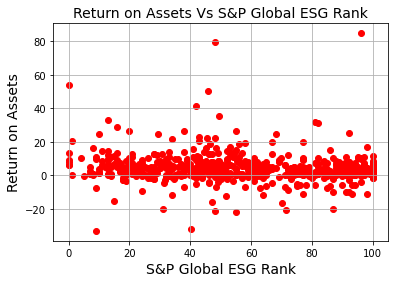

In [59]:
plt.scatter(ML_df_2019_vf['S&P Global ESG Rank'], ML_df_2019_vf['Return on Assets'], color='red')
plt.title('Return on Assets Vs S&P Global ESG Rank', fontsize=14)
plt.xlabel('S&P Global ESG Rank', fontsize=14)
plt.ylabel('Return on Assets', fontsize=14)
plt.grid(True)
plt.show()

No strong linear correlation visible for ESG Disclosure Score:

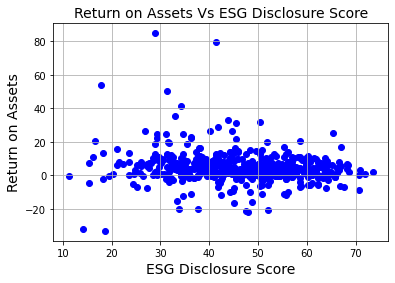

In [60]:
plt.scatter(ML_df_2019_vf['ESG Disclosure Score'], ML_df_2019_vf['Return on Assets'], color='blue')
plt.title('Return on Assets Vs ESG Disclosure Score', fontsize=14)
plt.xlabel('ESG Disclosure Score', fontsize=14)
plt.ylabel('Return on Assets', fontsize=14)
plt.grid(True)
plt.show()

Defining variables to train Multivariate Linear Regression model:

In [125]:
#Run Multivariate Linear Regression for all five years:

X_2016_2019 = ML_df_2016_2019_vf[['ESG Disclosure Score', 'Environmental Disclosure Score', 'Social Disclosure Score','Governance Disclosure Score']] 
Y_2016_2019 = ML_df_2016_2019_vf[['Return on Assets', "Tobin's Q Ratio"]]

#Slightly different code for the year 2015 since there is no S&P data available

X_2015 = ML_df_2015_vf[['ESG Disclosure Score', 'Environmental Disclosure Score', 'Social Disclosure Score','Governance Disclosure Score']] 
Y_2015 = ML_df_2015_vf[['Return on Assets', "Tobin's Q Ratio"]]

X_2016 = ML_df_2016_vf[['ESG Disclosure Score', 'Environmental Disclosure Score', 'Social Disclosure Score','Governance Disclosure Score', 'S&P Global ESG Rank', 'S&P Global Environmental Dimension Rank', 'S&P Global Governance & Economic Dimension Rank', 'S&P Global Social Dimension Rank']] 
Y_2016 = ML_df_2016_vf[['Return on Assets', "Tobin's Q Ratio"]]

X_2017 = ML_df_2017_vf[['ESG Disclosure Score', 'Environmental Disclosure Score', 'Social Disclosure Score','Governance Disclosure Score', 'S&P Global ESG Rank', 'S&P Global Environmental Dimension Rank', 'S&P Global Governance & Economic Dimension Rank', 'S&P Global Social Dimension Rank']] 
Y_2017 = ML_df_2017_vf[['Return on Assets', "Tobin's Q Ratio"]]

X_2018 = ML_df_2018_vf[['ESG Disclosure Score', 'Environmental Disclosure Score', 'Social Disclosure Score','Governance Disclosure Score', 'S&P Global ESG Rank', 'S&P Global Environmental Dimension Rank', 'S&P Global Governance & Economic Dimension Rank', 'S&P Global Social Dimension Rank']] 
Y_2018 = ML_df_2018_vf[['Return on Assets', "Tobin's Q Ratio"]]

X_2019 = ML_df_2019_vf[['Governance Disclosure Score', "R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2019 = ML_df_2019_vf[['Return on Assets', "Tobin's Q Ratio"]]



In [106]:
X_2019 = ML_df_2019_vf[['S&P Global Environmental Dimension Rank', 'S&P Global Governance & Economic Dimension Rank', 'S&P Global Social Dimension Rank',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]]
Y_2019 = ML_df_2019_vf[['Return on Assets', "Tobin's Q Ratio"]]

Train the Multivariate Linear Regression model:

Regression analysis with statsmodel tool (i.e. OLS) for different overview, but same results as above.

One for ROA and one for Tobin's Q ratio each.

In [126]:
#ROA:

print('----------')
print('2015')
print('----------')
X_2015 = sm.add_constant(X_2015) # adding a constant

#Change Y_2015 variable for that analysis:
Y_2015 = ML_df_2015_vf['Return on Assets']

model_2015 = sm.OLS(Y_2015, X_2015).fit()
predictions_2015 = model_2015.predict(X_2015) 
print_model_2015 = model_2015.summary()
print(print_model_2015)

print('----------')
print('2016')
print('----------')
X_2016 = sm.add_constant(X_2016) # adding a constant

#Change Y_2016 variable for that analysis:
Y_2016 = ML_df_2016_vf['Return on Assets']

model_2016 = sm.OLS(Y_2016, X_2016).fit()
predictions_2016 = model_2016.predict(X_2016) 
print_model_2016 = model_2016.summary()
print(print_model_2016)

print('----------')
print('2017')
print('----------')
X_2017 = sm.add_constant(X_2017) # adding a constant

#Change Y_2017 variable for that analysis:
Y_2017 = ML_df_2017_vf['Return on Assets']

model_2017 = sm.OLS(Y_2017, X_2017).fit()
predictions_2017 = model_2017.predict(X_2017) 
print_model_2017 = model_2017.summary()
print(print_model_2017)

print('----------')
print('2018')
print('----------')
X_2018 = sm.add_constant(X_2018) # adding a constant

#Change Y_2018 variable for that analysis:
Y_2018 = ML_df_2018_vf['Return on Assets']

model_2018 = sm.OLS(Y_2018, X_2018).fit()
predictions_2018 = model_2018.predict(X_2018) 
print_model_2018 = model_2018.summary()
print(print_model_2018)

print('----------')
print('2019')
print('----------')
X_2019 = sm.add_constant(X_2019) # adding a constant

#Change Y_2019 variable for that analysis:
Y_2019 = ML_df_2019_vf['Return on Assets']

model_2019 = sm.OLS(Y_2019, X_2019).fit()
predictions_2019 = model_2019.predict(X_2019) 
print_model_2019 = model_2019.summary()
print(print_model_2019)

----------
2015
----------
                            OLS Regression Results                            
Dep. Variable:       Return on Assets   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.501
Date:                Wed, 29 Sep 2021   Prob (F-statistic):            0.00777
Time:                        01:08:59   Log-Likelihood:                -2183.6
No. Observations:                 559   AIC:                             4377.
Df Residuals:                     554   BIC:                             4399.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [74]:
#Tobin's Q:

print('----------')
print('2015')
print('----------')
X_2015 = sm.add_constant(X_2015) # adding a constant

#Change Y_2015 variable for that analysis:
Y_2015 = ML_df_2015_vf["Tobin's Q Ratio"]

model_2015 = sm.OLS(Y_2015, X_2015).fit()
predictions_2015 = model_2015.predict(X_2015) 
print_model_2015 = model_2015.summary()
print(print_model_2015)

print('----------')
print('2016')
print('----------')
X_2016 = sm.add_constant(X_2016) # adding a constant

#Change Y_2016 variable for that analysis:
Y_2016 = ML_df_2016_vf["Tobin's Q Ratio"]

model_2016 = sm.OLS(Y_2016, X_2016).fit()
predictions_2016 = model_2016.predict(X_2016) 
print_model_2016 = model_2016.summary()
print(print_model_2016)

print('----------')
print('2017')
print('----------')
X_2017 = sm.add_constant(X_2017) # adding a constant

#Change Y_2017 variable for that analysis:
Y_2017 = ML_df_2017_vf["Tobin's Q Ratio"]

model_2017 = sm.OLS(Y_2017, X_2017).fit()
predictions_2017 = model_2017.predict(X_2017) 
print_model_2017 = model_2017.summary()
print(print_model_2017)

print('----------')
print('2018')
print('----------')
X_2018 = sm.add_constant(X_2018) # adding a constant

#Change Y_2018 variable for that analysis:
Y_2018 = ML_df_2018_vf["Tobin's Q Ratio"]

model_2018 = sm.OLS(Y_2018, X_2018).fit()
predictions_2018 = model_2018.predict(X_2018) 
print_model_2018 = model_2018.summary()
print(print_model_2018)

print('----------')
print('2019')
print('----------')
X_2019 = sm.add_constant(X_2019) # adding a constant

#Change Y_2019 variable for that analysis:
Y_2019 = ML_df_2019_vf["Tobin's Q Ratio"]

model_2019 = sm.OLS(Y_2019, X_2019).fit()
predictions_2019 = model_2019.predict(X_2019) 
print_model_2019 = model_2019.summary()
print(print_model_2019)

----------
2015
----------
                            OLS Regression Results                            
Dep. Variable:        Tobin's Q Ratio   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.583
Date:                Tue, 28 Sep 2021   Prob (F-statistic):            0.00675
Time:                        22:32:59   Log-Likelihood:                -1393.3
No. Observations:                 559   AIC:                             2797.
Df Residuals:                     554   BIC:                             2818.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [69]:
# with sklearn

print('----------')
print('2016-2019')
print('----------')
regr_2016_2019 = linear_model.LinearRegression()
regr_2016_2019.fit(X_2016_2019, Y_2016_2019)
print('Intercept: \n', regr_2016_2019.intercept_)
print('Coefficients: \n', regr_2016_2019.coef_)

print('----------')
print('2015')
print('----------')
regr_2015 = linear_model.LinearRegression()
regr_2015.fit(X_2015, Y_2015)
print('Intercept: \n', regr_2015.intercept_)
print('Coefficients: \n', regr_2015.coef_)

print('----------')
print('2016')
print('----------')
regr_2016 = linear_model.LinearRegression()
regr_2016.fit(X_2016, Y_2016)
print('Intercept: \n', regr_2016.intercept_)
print('Coefficients: \n', regr_2016.coef_)

print('----------')
print('2017')
print('----------')
regr_2017 = linear_model.LinearRegression()
regr_2017.fit(X_2017, Y_2017)
print('Intercept: \n', regr_2017.intercept_)
print('Coefficients: \n', regr_2017.coef_)

print('----------')
print('2018')
print('----------')
regr_2018 = linear_model.LinearRegression()
regr_2018.fit(X_2018, Y_2018)
print('Intercept: \n', regr_2018.intercept_)
print('Coefficients: \n', regr_2018.coef_)

print('----------')
print('2019')
print('----------')
regr_2019 = linear_model.LinearRegression()
regr_2019.fit(X_2019, Y_2019)
print('Intercept: \n', regr_2019.intercept_)
print('Coefficients: \n', regr_2019.coef_)


print('----------')
print('Trial')
print('----------')
regr_Trial = linear_model.LinearRegression()
regr_Trial.fit(X_Trial, Y_Trial)
print('Intercept: \n', regr_Trial.intercept_)
print('Coefficients: \n', regr_Trial.coef_)

----------
2016-2019
----------
Intercept: 
 [12.35816131  4.66475155]
Coefficients: 
 [[ 0.46155369 -0.32631031 -0.12139085 -0.14967767]
 [-0.19596058  0.07729173  0.04483215  0.02262717]]
----------
2015
----------
Intercept: 
 [8.46236141 2.97103649]
Coefficients: 
 [[-0.07767715 -0.0875846   0.03354051  0.0472553 ]
 [-0.05048444 -0.00539997  0.024724    0.00515628]]
----------
2016
----------
Intercept: 
 [12.47096105  3.53476314]
Coefficients: 
 [[ 0.96661174 -0.6156639  -0.21890789 -0.23624526 -0.36524018 -0.11285269
   0.18623969  0.28680822]
 [-0.15654791  0.0471205   0.04280864  0.02409355 -0.02461867 -0.00299347
   0.02702959  0.00792618]]
----------
2017
----------
Intercept: 
 [10.21796404  3.98273138]
Coefficients: 
 [[-1.54628916  0.74379322  0.3850195   0.36149776 -0.07865975 -0.02617589
   0.08839845 -0.0030045 ]
 [-0.81276728  0.39866458  0.19917584  0.17174029 -0.00690635 -0.00690243
   0.01072448  0.004398  ]]
----------
2018
----------
Intercept: 
 [13.76132407  5.6

Prediction with sklearn to make use of defined linear regression. This is not necessarily needed for the analysis but beneficial for the understanding of the numbers.

In [64]:
New_ESG_Disclosure_Score = 18.6
New_Environmental_Disclosure_Score = 3.86
New_Social_Disclosure_Score = 22.81
New_Governance_Disclosure_Score = 48.21
New_SandP_Global_ESG_Rank = 82
New_SandP_Global_Environmental_Dimension_Rank = 80
New_SandP_Global_Governance_and_Economic_Dimension_Rank = 68
New_SandP_Global_Social_Dimension_Rank = 77

print("Predicted Return on Assets and Tobin's Q Ratio", regr_2019.predict([[New_ESG_Disclosure_Score,New_Environmental_Disclosure_Score,New_Social_Disclosure_Score,New_Governance_Disclosure_Score,New_SandP_Global_ESG_Rank,New_SandP_Global_Environmental_Dimension_Rank,New_SandP_Global_Governance_and_Economic_Dimension_Rank,New_SandP_Global_Social_Dimension_Rank]]))

Predicted Return on Assets and Tobin's Q Ratio [[7.247374   4.04376171]]
